## Languages

Languages can also influence the difference between the two ratings.

In [18]:
#data = pd.read_csv("C:\\Users\\97455\\Downloads\\cmu_movies_augmented.csv")
data = pd.read_csv('data/processed/cmu_movies_augmented.csv')
data.head()

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0
1,171005,/m/016ywb,Henry V,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3


In [19]:
data['imdb_rating_scaled'] = data['imdb_rating'] * 10
data['rating_difference'] = data['metascore'] - data['imdb_rating_scaled']
data['rating_ratio'] = data['imdb_rating_scaled'] / data['metascore']

print(f'Total movies: {len(data)}')
data.dropna(subset=['rating_difference'], inplace=True)
print(f'Total movies with rating_difference: {len(data)}')

Total movies: 8529
Total movies with rating_difference: 7770


In [20]:
def process_languages(df):
    df_language = df.copy()
    # Function to convert string to dictionary
    def string_to_dict(column_string):
        try:
            return literal_eval(column_string)
        except ValueError:
            return {}

    # Function to get the first value from a dictionary
    def get_first_value_from_dict(column_data):
        if isinstance(column_data, dict) and len(column_data) > 0:
            return next(iter(column_data.values()))
        return None

    # Convert string representations of dictionaries to actual dictionaries
    df_language['languages'] = df_language['languages'].apply(string_to_dict)
    # Extract the first value for language
    df_language['languages'] = df_language['languages'].apply(get_first_value_from_dict)
    
    return df_language

In [21]:
data_language = process_languages(data)

In [22]:
data_language.head()

,wikipedia_id,freebase_id,name,revenue,runtime,languages,countries,genres,release_date_datetime,imdb_id,metacritic_id,imdb_rating,imdb_votes,metascore,count_nomination,count_award,imdb_rating_scaled,rating_difference,rating_ratio
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,English Language,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,tt0228333,movie/ghosts-of-mars,4.9,56930.0,35.0,2,0,49.0,-14.0,1.400000
1,171005,/m/016ywb,Henry V,10161099.0,137.0,English Language,"{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989-11-08,tt0097499,movie/henry-v,7.5,31214.0,83.0,13,12,75.0,8.0,0.903614
2,77856,/m/0kcn7,Mary Poppins,102272727.0,139.0,English Language,"{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964-08-27,tt0058331,movie/mary-poppins,7.8,181857.0,88.0,17,22,78.0,10.0,0.886364
3,612710,/m/02wjqm,New Rose Hotel,21521.0,92.0,English Language,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999-10-01,tt0133122,movie/new-rose-hotel,5.1,5989.0,31.0,2,2,51.0,-20.0,1.645161
4,21926710,/m/05p45cv,White on Rice,NaN,82.0,None,"{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",2009-01-01,tt0892904,movie/white-on-rice,6.1,545.0,45.0,0,3,61.0,-16.0,1.355556


In [26]:
# Filter out languages with less than 10 movies
languages_threshold = 10
df_language = data_language.groupby('languages').filter(lambda x: len(x) >= languages_threshold)

print(f"Movies with languages: {len(df_language['freebase_id'].unique())}/{len(data)}")
print(f"Languages with >={languages_threshold} movies: {len(df_language['languages'].unique())}/{len(df_language['languages'].unique())}")

Movies with languages: 7312/7770
Languages with >=10 movies: 36/36


### Basic visual exploration


Top 15:


,languages,rating_difference
22,Polish Language,1.315789
14,Irish,0.200000
24,Romanian Language,-0.117647
21,Persian Language,-0.268293
8,French Language,-2.810738
32,Turkish Language,-3.384615
29,Swedish Language,-3.606061
26,Spanish Language,-4.383178
20,Norwegian Language,-4.454545
11,Hebrew Language,-4.809524



Bottom 15:


,languages,rating_difference
3,Chinese language,-7.576923
31,Thai Language,-7.666667
18,Latin Language,-7.666667
23,Portuguese Language,-7.675000
12,Hindi Language,-7.782609
25,Russian Language,-7.804878
19,Mandarin Chinese,-7.866667
5,Danish Language,-8.428571
35,Yiddish Language,-8.750000
7,English Language,-9.357755


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

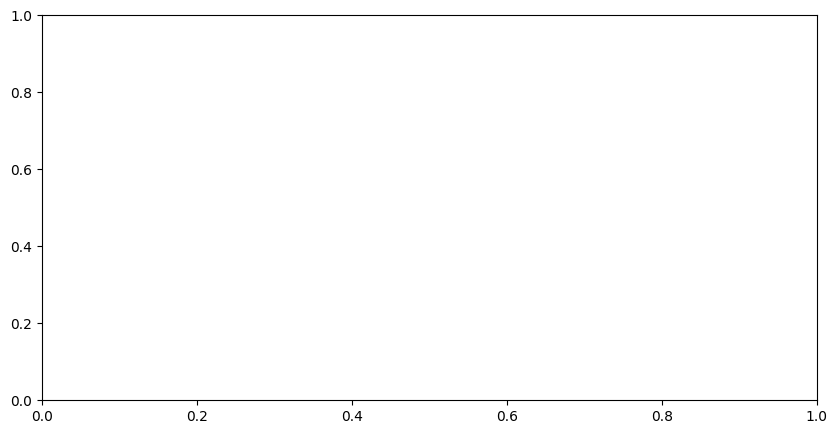

In [27]:
# Plot the barplot of rating difference per language (sorted by mean rating difference)

# Group by language and calculate average rating_difference for each language
language_scores = df_language.groupby('languages')['rating_difference'].mean().reset_index()

if len(language_scores) > 30:
    language_scores_sorted = language_scores.sort_values(by='rating_difference', ascending=False)
    plot_results(df_language.loc[df_language['languages'].isin(pd.concat([language_scores_sorted.head(15)['languages'], language_scores_sorted.tail(15)['languages']]))], 'languages', 'rating_difference', 'Average Rating Difference by Language')
else:
    display(language_scores)
    plot_results(df_language, 'languages', 'rating_difference', 'Average Rating Difference by Language')


In [ ]:
# Export the data to a json file
#export_json(df_language.groupby('languages')['rating_difference'].agg(['mean', 'sem', 'count']).reset_index(), 'website/public/data/languages-1.json')

### Hotencoding

In [28]:
# Hot encode languages per movie
one_hot_languages, one_hot_languages_columns = hotencode(df_language, 'languages', id_column='freebase_id', prefix='onehot-language')

# Add the rating_difference column
one_hot_languages = one_hot_languages.merge(df_language[['freebase_id', 'rating_difference']].drop_duplicates(), on='freebase_id')

print(one_hot_languages.shape)

(7312, 38)


### Pearson Correlation

Significant results: 12/36


,correlation,p_value,lower_ci,upper_ci,feature,col_id,number_of_movies,Languages
onehot-language_French Language,0.139063,6.698615e-33,0.116513,0.161470,onehot-language_French Language,French Language,745,French Language
onehot-language_Persian Language,0.046056,8.160120e-05,0.023159,0.068904,onehot-language_Persian Language,Persian Language,41,Persian Language
onehot-language_Polish Language,0.037679,1.270465e-03,0.014771,0.060549,onehot-language_Polish Language,Polish Language,19,Polish Language
onehot-language_Spanish Language,0.035207,2.604184e-03,0.012295,0.058081,onehot-language_Spanish Language,Spanish Language,107,Spanish Language
onehot-language_Romanian Language,0.030181,9.854086e-03,0.007264,0.053066,onehot-language_Romanian Language,Romanian Language,17,Romanian Language
onehot-language_Japanese Language,0.027942,1.687576e-02,0.005024,0.050831,onehot-language_Japanese Language,Japanese Language,223,Japanese Language
onehot-language_Arabic Language,0.024295,3.776508e-02,0.001374,0.047190,onehot-language_Arabic Language,Arabic Language,74,Arabic Language
onehot-language_Irish,0.024063,3.962865e-02,0.001142,0.046959,onehot-language_Irish,Irish,10,Irish
onehot-language_Swedish Language,0.023578,4.379254e-02,0.000657,0.046474,onehot-language_Swedish Language,Swedish Language,33,Swedish Language
onehot-language_Ukrainian Language,-0.024953,3.287006e-02,-0.047847,-0.002032,onehot-language_Ukrainian Language,Ukrainian Language,10,Ukrainian Language


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

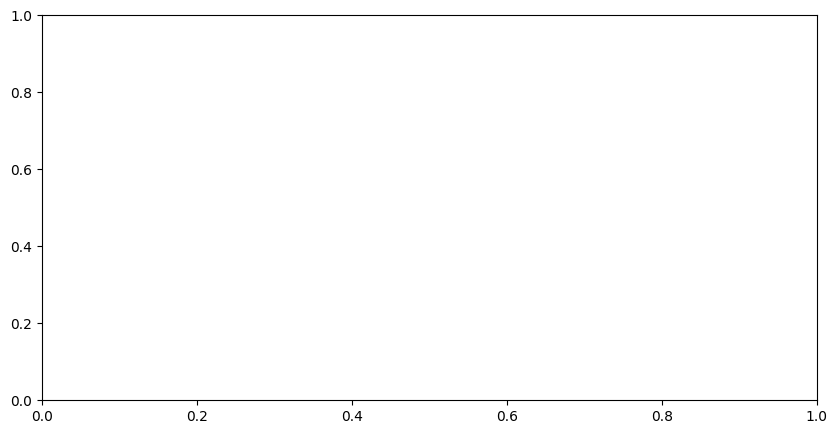

In [32]:
def map_languages_columns(df):
    df['number_of_movies'] = df['col_id'].apply(lambda x: len(df_language[df_language['languages'] == x]))
    return df

languages_pearsonr_results, languages_pearsonr_significant = study_pearson(
    one_hot_languages,
    one_hot_languages_columns,
    'rating_difference',
    colname='Languages',
    threshold=0.05,
    print_results=True,
    title="Significant pearson correlation between languages and rating_difference",
    map_columns_name=map_languages_columns
)

In [31]:
# Export the data to a json file
#export_json(languages_pearsonr_results, 'website/public/data/languages-2.json')

### OLS

Dep. Variable:,rating_difference,R-squared:,0.034
Model:,OLS,Adj. R-squared:,0.029
Method:,Least Squares,F-statistic:,7.228
Date:,"Thu, 21 Dec 2023",Prob (F-statistic):,3.83e-34
Time:,11:38:37,Log-Likelihood:,-28825.
No. Observations:,7312,AIC:,5.772e+04
Df Residuals:,7276,BIC:,5.797e+04
Df Model:,35,,
Covariance Type:,nonrobust,,


Omnibus:,54.759,Durbin-Watson:,1.895
Prob(Omnibus):,0.000,Jarque-Bera (JB):,53.256
Skew:,-0.187,Prob(JB):,2.73e-12
Kurtosis:,2.811,Cond. No.,2.35e+08




-- Baseline Comparaison --


,r2,r2-adj,mae,mse
model,0.033601,0.028952,10.067597,155.475162
baseline,0.0,0.0,10.266787,160.880941
improvement,inf,inf,-1.94%,-3.36%


Significant results: 3/36


,feature,coef,p_value,lower_ci,upper_ci,col_id,number_of_movies,Languages
2,onehot-language_Persian Language,4.1969,0.031,0.372,8.022,Persian Language,41,Persian Language
1,onehot-language_French Language,3.3398,0.000,2.100,4.580,French Language,745,French Language
0,onehot-language_English Language,-3.0949,0.000,-4.036,-2.154,English Language,5132,English Language


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

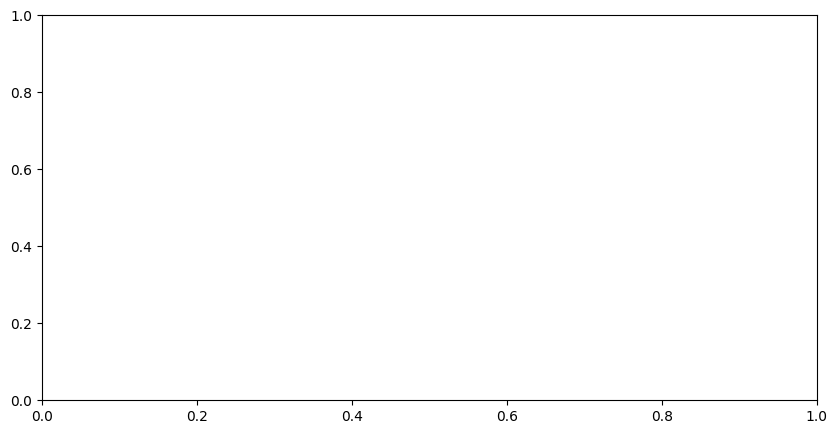

In [33]:
languages_ols_results, languages_ols_significant = study_OLS(
    one_hot_languages,
    one_hot_languages_columns,
    'rating_difference',
    colname='Languages',
    regularization='l1',
    alpha=0.01,
    threshold=0.05,
    print_results=True,
    print_qq=False,
    print_baseline=True,
    title='OLS - Languages',
    map_columns_name=map_languages_columns
)

In [34]:
# Export the data to a json file
#export_json(languages_ols_results, 'website/public/data/languages-3.json')

In [36]:
plot_specific_scatter(df_language, 'Language', 'Persian Language')

KeyError: 'Language'

In [ ]:
# save all imdb_ids per language
df_language \
    .loc[df_language['languages'].isin(languages_ols_results['Languages'])]  \
    .groupby('languages') \
    .apply(lambda x: x['imdb_id'].tolist()) \
    .to_json('website/public/data/playground-languages.json')
